In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
from tqdm import tqdm

## Matrix Method 

In [12]:

k = 3

#initializations

Tleft = 0.
Tbottom = 0.
Tright = 100.
Ttop =100.

T = np.zeros((k+2,k+2))
Tguess = 10

T.fill(Tguess)
T[0,:] = Tleft
T[-1,:] = Tright
T[:,0] = Tbottom
T[:,-1] = Ttop

d = np.ones(k)
I = np.eye(k,k)

M = sp.sparse.diags([d,-2*d,d],[-1,0,1],shape = (k,k))
M = M.toarray()
M

array([[-2.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1., -2.]])

In [3]:
S = np.kron(M,I) + np.kron(I,M)
S

array([[-4.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -4.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -4.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -4.]], shape=(2500, 2500))

In [4]:
T

array([[  0.,   0.,   0., ...,   0.,   0., 100.],
       [  0.,  10.,  10., ...,  10.,  10., 100.],
       [  0.,  10.,  10., ...,  10.,  10., 100.],
       ...,
       [  0.,  10.,  10., ...,  10.,  10., 100.],
       [  0.,  10.,  10., ...,  10.,  10., 100.],
       [  0., 100., 100., ..., 100., 100., 100.]], shape=(52, 52))

In [5]:
bver = np.zeros(k**2)
bhor = np.zeros(k**2)
for i in range(k):
    bver[i] = T[0,i+1]
    bver[k**2 - 1-i] = T[-1,k-i]
    bhor[i*k] = T[i+1,0]
    bhor[(i+1)*k - 1] = T[i+1,-1]
bver
bhor

array([  0.,   0.,   0., ...,   0.,   0., 100.], shape=(2500,))

In [6]:
b = -bhor - bver

In [7]:
u = np.linalg.solve(S,b)
u = u.reshape(k,k)
u

array([[8.41789115e-02, 1.68357823e-01, 2.52538507e-01, ...,
        2.09386428e+01, 3.02346607e+01, 5.00000000e+01],
       [1.68357823e-01, 3.36713873e-01, 5.05069923e-01, ...,
        3.76710483e+01, 5.00000000e+01, 6.97653393e+01],
       [2.52538507e-01, 5.05069923e-01, 7.57592474e-01, ...,
        5.00000000e+01, 6.23289517e+01, 7.90613572e+01],
       ...,
       [2.09386428e+01, 3.76710483e+01, 5.00000000e+01, ...,
        9.92424075e+01, 9.94949301e+01, 9.97474615e+01],
       [3.02346607e+01, 5.00000000e+01, 6.23289517e+01, ...,
        9.94949301e+01, 9.96632861e+01, 9.98316422e+01],
       [5.00000000e+01, 6.97653393e+01, 7.90613572e+01, ...,
        9.97474615e+01, 9.98316422e+01, 9.99158211e+01]], shape=(50, 50))

In [8]:
T[1:-1,1:-1] = u
print(T)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+02]
 [0.00000000e+00 8.41789115e-02 1.68357823e-01 ... 3.02346607e+01
  5.00000000e+01 1.00000000e+02]
 [0.00000000e+00 1.68357823e-01 3.36713873e-01 ... 5.00000000e+01
  6.97653393e+01 1.00000000e+02]
 ...
 [0.00000000e+00 3.02346607e+01 5.00000000e+01 ... 9.96632861e+01
  9.98316422e+01 1.00000000e+02]
 [0.00000000e+00 5.00000000e+01 6.97653393e+01 ... 9.98316422e+01
  9.99158211e+01 1.00000000e+02]
 [0.00000000e+00 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
  1.00000000e+02 1.00000000e+02]]


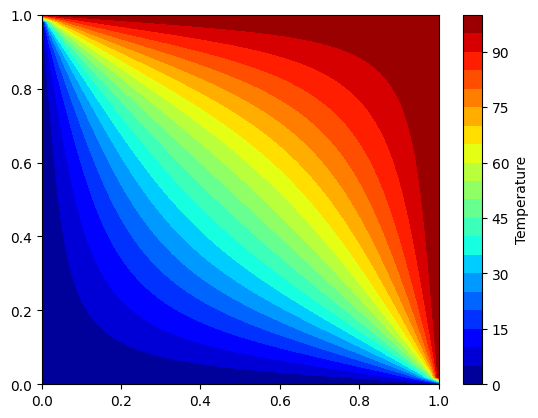

In [9]:
Lx =1
Ly = 1
x = np.linspace(0,Lx,k+2)
y = np.linspace(0,Ly,k+2)

X,Y = np.meshgrid(x,y,indexing='ij')

plt.contourf(X,Y,T,levels =20,cmap = 'jet')
plt.colorbar(label = 'Temperature')
plt.show()

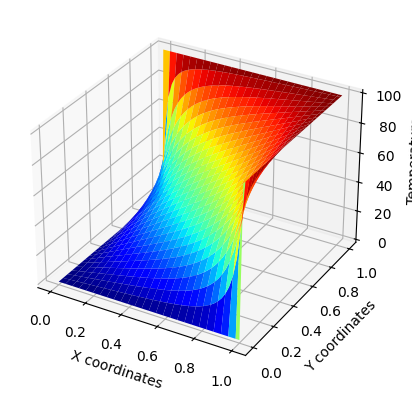

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,T,cmap ='jet')
ax.set_xlabel('X coordinates')
ax.set_ylabel('Y coordinates')
ax.set_zlabel('Temperature')

# ax.view_init(elev=90,azim=270)
plt.show()

## Iterative Methods

In [11]:
Lx =1.0
Ly = 1.0
nx= 3
ny = 3

x = np.linspace(0,Lx,nx+2)
y = np.linspace(0,Lx,ny+2)
X,Y = np.meshgrid(x,y,indexing='ij')

dx = Lx/(nx+1)
dy = Ly/(ny+1)

Tleft =0.
Tbottom =0.
Tright = 100.
Ttop =100.

Tguess =10.
T = np.zeros(shape=(nx+2,ny+2))
T.fill(Tguess)

T[0,:] = Tleft
T[-1,:] = Tright
T[:,-1] = Ttop
T[:,0] = Tbottom

nt = 1000

for _ in tqdm(range(nt)):
    for i in range(1,nx+1):
        for j in range(1,ny+1):
            T[i,j] = (dy**2*(T[i+1,j] + T[i-1,j]) + dx**2*(T[i,j+1]+T[i,j-1]))/(2*(dx**2+dy**2))

print(T)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 78859.57it/s]

[[  0.           0.           0.           0.         100.        ]
 [  0.          14.28571429  28.57142857  50.         100.        ]
 [  0.          28.57142857  50.          71.42857143 100.        ]
 [  0.          50.          71.42857143  85.71428571 100.        ]
 [  0.         100.         100.         100.         100.        ]]
